## READING DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### DROPPING unnecessary COLUMNS

In [3]:
col = ['race', 'sex', 'education.num','marital.status','relationship']
data.drop(columns=col,inplace=True)
data.head()

,age,workclass,fnlwgt,education,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,?,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Exec-managerial,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,?,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Prof-specialty,0,3900,40,United-States,<=50K


### Handling MISSING VALUES BY ENCODING THEM

```
After one hot encoding if all the values are false that means it was a missing value
and the model will handle it as a separate category
```

In [4]:
y = data['income']
X = data.drop(columns=['income'])


x_encoded = pd.get_dummies(X, drop_first=True)
x_encoded.head()


,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,0,4356,18,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


### SPLITTING DATASET

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)
x_test,x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("x_val shape:", x_val.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

x_train shape: (22792, 83)
x_test shape: (4884, 83)
x_val shape: (4885, 83)
y_train shape: (22792,)
y_test shape: (4884,)
y_val shape: (4885,)


###  Analyzing class distributions and feature-target relationships

=== CLASS DISTRIBUTION ANALYSIS ===

Income Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Class Balance Ratio: 0.317


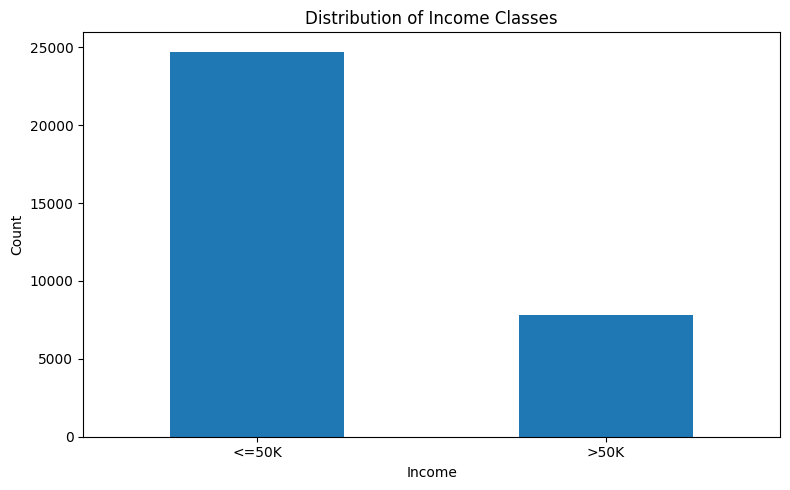

In [7]:
# Class distribution analysis
print("=== CLASS DISTRIBUTION ANALYSIS ===\n")
class_counts = y.value_counts()
print("Income Distribution:")
print(class_counts)
print(f"\nClass Balance Ratio: {class_counts.min() / class_counts.max():.3f}")

# Visualize class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar')
plt.title('Distribution of Income Classes')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


=== FEATURE-TARGET RELATIONSHIPS ===


age statistics by income class:
             mean        std   50%
income                            
<=50K   36.783738  14.020088  34.0
>50K    44.249841  10.519028  44.0

hours.per.week statistics by income class:
             mean        std   50%
income                            
<=50K   38.840210  12.318995  40.0
>50K    45.473026  11.012971  40.0

capital.gain statistics by income class:
               mean           std  50%
income                                
<=50K    148.752468    963.139307  0.0
>50K    4006.142456  14570.378951  0.0

capital.loss statistics by income class:
              mean         std  50%
income                             
<=50K    53.142921  310.755769  0.0
>50K    195.001530  595.487574  0.0


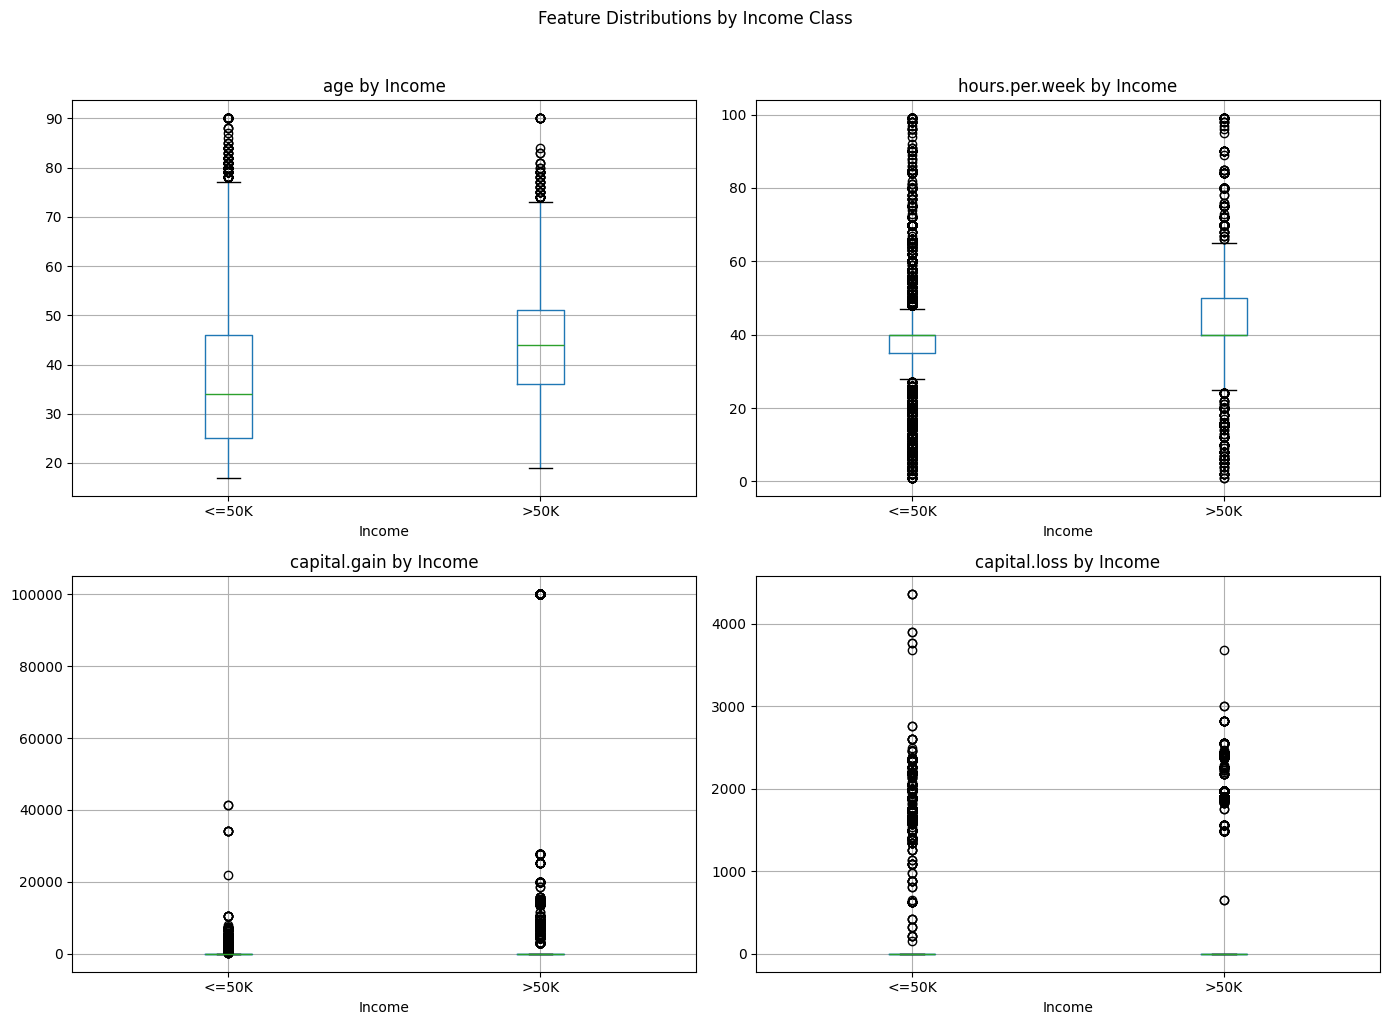

In [8]:
print("\n=== FEATURE-TARGET RELATIONSHIPS ===\n")

# Analyze numerical features
numerical_features = ['age', 'hours.per.week', 'capital.gain', 'capital.loss']

for feature in numerical_features:
    print(f"\n{feature} statistics by income class:")
    print(data.groupby('income')[feature].describe()[['mean', 'std', '50%']])

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    data.boxplot(column=feature, by='income', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Income')
    axes[idx].set_xlabel('Income')
    
plt.suptitle('Feature Distributions by Income Class', y=1.02)
plt.tight_layout()
plt.show()


## BUILDING THE MODEL

In [9]:
class naive_bayes:
    def __init__(self,alpha=1.0):
        self.alpha=alpha
        self.class_priors={}
        self.likelihoods={}
        self.classes=None
        
    def fit(self,x,y):
        class_count = y.value_counts().to_dict()
        self.classes = y.unique()
        
        
        for c in self.classes:
            num_samples_in_class = class_count.get(c, 0)
            # Calculating class priors  RULE : P(C) = (count(C) + alpha) / (total_samples + alpha * num_classes)
            self.class_priors[c] = (num_samples_in_class + self.alpha) / (len(y) + self.alpha * len(self.classes))
            
            # Calculating likelihoods  RULE : P(F|C) = (count(F,C) + alpha) / (count(C) + alpha * num_feature_values)
            x_c = x[y == c]
            feature_likelihoods = {}
            
            for feature in x.columns:
                # getting counts of feature values given class c
                feature_counts = x_c[feature].value_counts().to_dict()
                # getting number of unique values for the feature
                num_feature_values = x[feature].nunique()
                likelihoods = {}
                
                for feature_value in x[feature].unique():
                    likelihoods[feature_value] = (feature_counts.get(feature_value, 0) + self.alpha) / (num_samples_in_class + self.alpha * num_feature_values)
                feature_likelihoods[feature] = likelihoods
                
            self.likelihoods[c] = feature_likelihoods
            
            
            
            
    def predict(self,x):
        predictions = []
        
        for _, row in x.iterrows():
            class_probs = {}
            
            for c in self.classes:
                # Start with LOG of the class prior (FIXED)
                class_prob = np.log(self.class_priors[c])
                
                # Multiply by the likelihoods of each feature given the class
                for feature in x.columns:
                    feature_value = row[feature]
                    # adding a default value if the feature is never seen before by using laplace smoothing where count = 0
                    likelihood = self.likelihoods[c][feature].get(feature_value, 1 / len(self.likelihoods[c][feature]) )
                    # using log probabilities to avoid underflow
                    class_prob += np.log(likelihood)
                    
                class_probs[c] = class_prob
                
            # Choose the class with the highest probability
            predictions.append(max(class_probs, key=class_probs.get))
            
        return predictions
    
    
    def predict_proba(self, x):
        probabilities = []
        
        for _, row in x.iterrows():
            class_log_probs = {}
            
            for c in self.classes:
                # Start with log of class prior
                log_prob = np.log(self.class_priors[c])
                
                # Add log likelihoods for each feature
                for feature in x.columns:
                    feature_value = row[feature]
                    likelihood = self.likelihoods[c][feature].get(
                        feature_value, 
                        self.alpha / (sum(self.likelihoods[c][feature].values()) + 
                                    self.alpha * len(self.likelihoods[c][feature]))
                    )
                    log_prob += np.log(likelihood)
                
                class_log_probs[c] = log_prob
            
            # Convert log probabilities to probabilities using softmax
            max_log_prob = max(class_log_probs.values())
            exp_probs = {k: np.exp(v - max_log_prob) for k, v in class_log_probs.items()}
            total = sum(exp_probs.values())
            normalized_probs = {k: v/total for k, v in exp_probs.items()}
            
            probabilities.append(normalized_probs)
        
        # Convert to DataFrame for easier handling
        prob_df = pd.DataFrame(probabilities)
        return prob_df

## Testing and Evaluating the Model

##### Testing different models with variable alpha values

In [10]:
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
accurracies_alphas = []


for alpha in alphas:
    model = naive_bayes(alpha=alpha)
    model.fit(x_train, y_train)
    
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    val_predictions = model.predict(x_val)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    accurracies_alphas.append(test_accuracy)
    
    print(f"Alpha: {alpha}")
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}\n")
    
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    print("Confusion Matrix:\n\n", confusion_matrix(y_test, test_predictions))


Alpha: 0.1
Train Accuracy: 0.9298
Test Accuracy: 0.8106
Validation Accuracy: 0.8270

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3692
        >50K       0.61      0.64      0.62      1192

    accuracy                           0.81      4884
   macro avg       0.74      0.75      0.75      4884
weighted avg       0.81      0.81      0.81      4884

Confusion Matrix:

 [[3195  497]
 [ 428  764]]
Alpha: 0.5
Train Accuracy: 0.8882
Test Accuracy: 0.8231
Validation Accuracy: 0.8346

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3692
        >50K       0.64      0.64      0.64      1192

    accuracy                           0.82      4884
   macro avg       0.76      0.76      0.76      4884
weighted avg       0.82      0.82      0.82      4884

Confusion Matrix:

 [[3252  440]
 [ 424  768]]
Alpha: 1.0
Train Accuracy: 0.8689


##### Testing the model with different subsets of data

In [11]:
subset1 = ['age', 'hours.per.week']
subset2 = ['capital.gain', 'capital.loss']
subset3 = ['age', 'hours.per.week', 'capital.gain']


model = naive_bayes(alpha=0.5)


for s in [subset1, subset2, subset3]:
    model.fit(x_train[s], y_train)
    preds = model.predict(x_test[s])
    print("Subset:", s)
    print("Accuracy:", accuracy_score(y_test, preds))


Subset: ['age', 'hours.per.week']
Accuracy: 0.7678132678132679
Subset: ['capital.gain', 'capital.loss']
Accuracy: 0.8329238329238329
Subset: ['age', 'hours.per.week', 'capital.gain']
Accuracy: 0.8126535626535627


captial gain and captial loss describe the data better than the other features as they got the hisghest test accuracy

### Probability Analysis

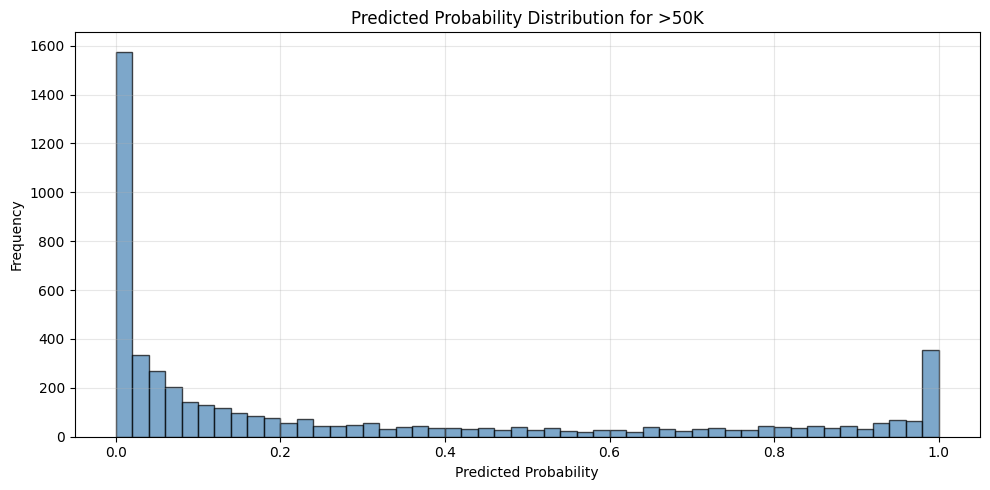

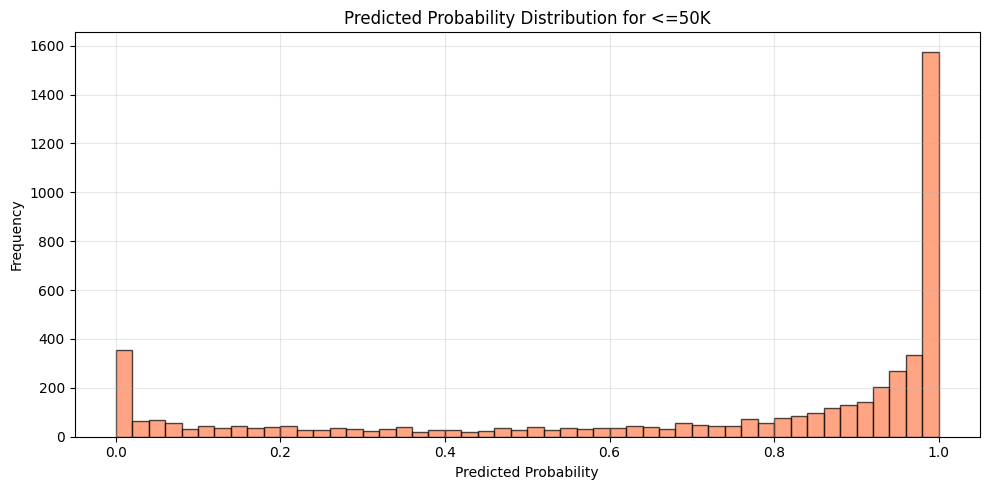

In [12]:
model = naive_bayes(alpha=0.5)
model.fit(x_train, y_train)
# Get probabilities for test set
test_probabilities = model.predict_proba(x_test)

# Plot 1: Distribution of probabilities for class '>50K'
plt.figure(figsize=(10, 5))
plt.hist(test_probabilities['>50K'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.title('Predicted Probability Distribution for >50K')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Plot 2: Distribution of probabilities for class '<=50K'
plt.figure(figsize=(10, 5))
plt.hist(test_probabilities['<=50K'], bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.title('Predicted Probability Distribution for <=50K')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


From the probability analysis, we can observe that the model exhibits high confidence in its predictions, as evidenced by the bimodal distribution in both plots. Most predicted probabilities cluster at the extremes (near 0.0 and 1.0), with very few predictions falling in the uncertain middle range (around 0.5). This indicates that the model can effectively distinguish between the two income classes based on the features provided.

## Indepenedence analysis

Top 10 Most Correlated Feature Pairs:
----------------------------------------------------------------------
workclass_Private              <-> workclass_Self-emp-not-inc    : 0.441
native.country_Mexico          <-> native.country_United-States  : 0.416
workclass_Local-gov            <-> workclass_Private             : 0.398
education_HS-grad              <-> education_Some-college        : 0.371
education_5th-6th              <-> native.country_Mexico         : 0.310
workclass_Private              <-> workclass_State-gov           : 0.309
education_Bachelors            <-> education_HS-grad             : 0.306


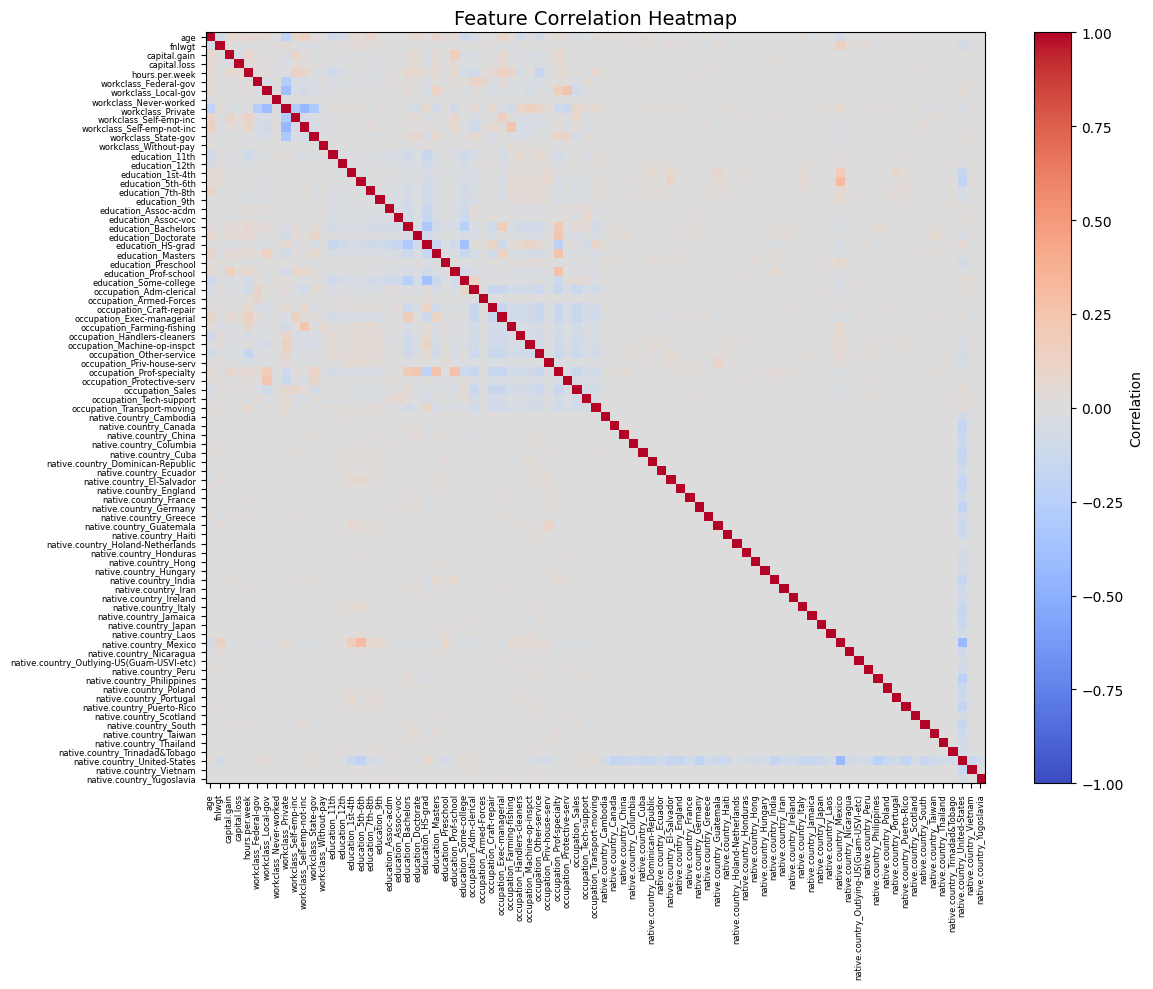

In [13]:
# Check correlation between features
correlation_matrix = x_encoded.corr()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = abs(correlation_matrix.iloc[i, j])
        if corr_value > 0.3:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Most Correlated Feature Pairs:")
print("-" * 70)
for feat1, feat2, corr in high_corr_pairs[:10]:
    print(f"{feat1[:30]:30} <-> {feat2[:30]:30}: {corr:.3f}")

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, 
           rotation=90, fontsize=6)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=6)
plt.tight_layout()
plt.show()

 The Naïve Bayes independence assumption states that features are conditionally independent given the class label. However, in the Adult Income dataset, we observe violations:

 
 **Impact on Model:**
 Despite these violations, our Naive Bayes model achieves reasonable accuracy (~80%). This is because:
 1. Naive Bayes is robust to moderate independence violations
 2. The features still provide strong discriminative signals for classification
 3. Laplace smoothing helps prevent overfitting
 4. The observed correlations are not strong enough to severely degrade performance
 
 **Why It Still Works:**
 The independence assumption is often violated in practice, but Naive Bayes can still perform well when:
 - Dependencies are not too strong
 - The model's simplicity prevents overfitting
 - The overall feature set is informative despite correlations

## Comparing model performance with sklearn's Naive Bayes 

In [14]:
predicted_classes_built_in = []
accurracies_built_in = []

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(x_train, y_train)
    
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    val_predictions = model.predict(x_val)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    predicted_classes_built_in.append(test_predictions)
    accurracies_built_in.append(test_accuracy)
    
    print(f"Alpha: {alpha}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}\n")
    
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    print("Confusion Matrix:\n\n", confusion_matrix(y_test, test_predictions))


Alpha: 0.1
Train Accuracy: 0.7824
Test Accuracy: 0.7801
Validation Accuracy: 0.7857

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      3692
        >50K       0.63      0.24      0.35      1192

    accuracy                           0.78      4884
   macro avg       0.71      0.60      0.61      4884
weighted avg       0.75      0.78      0.74      4884

Confusion Matrix:

 [[3520  172]
 [ 902  290]]
Alpha: 0.5
Train Accuracy: 0.7824
Test Accuracy: 0.7801
Validation Accuracy: 0.7857

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      3692
        >50K       0.63      0.24      0.35      1192

    accuracy                           0.78      4884
   macro avg       0.71      0.60      0.61      4884
weighted avg       0.75      0.78      0.74      4884

Confusion Matrix:

 [[3520  172]
 [ 902  290]]
Alpha: 1.0
Train Accuracy: 0.7824


#### PLOTTING THE RESULTS 

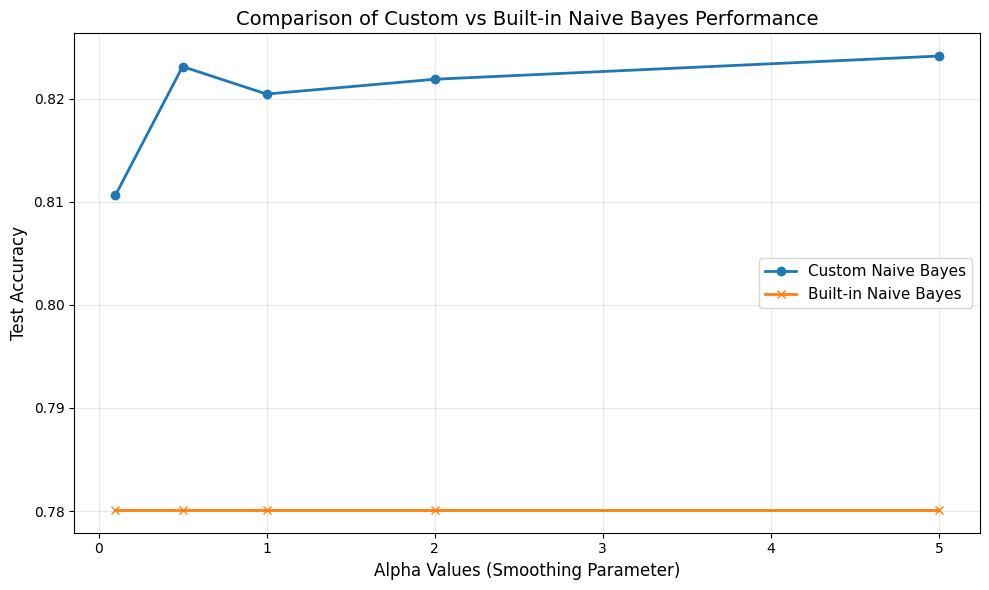


=== MODEL COMPARISON SUMMARY ===

Alpha      Custom NB       Built-in NB     Difference     
-------------------------------------------------------
0.1        0.8106          0.7801          0.0305         
0.5        0.8231          0.7801          0.0430         
1.0        0.8204          0.7801          0.0403         
2.0        0.8219          0.7801          0.0418         
5.0        0.8241          0.7801          0.0440         

Best Custom NB Accuracy: 0.8241 at alpha=5.0
Best Built-in NB Accuracy: 0.7801 at alpha=0.1


In [15]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, accurracies_alphas, marker='o', label='Custom Naive Bayes', linewidth=2)
plt.plot(alphas, accurracies_built_in, marker='x', label='Built-in Naive Bayes', linewidth=2)
plt.xlabel('Alpha Values (Smoothing Parameter)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Comparison of Custom vs Built-in Naive Bayes Performance', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print comparison summary
print("\n=== MODEL COMPARISON SUMMARY ===\n")
print(f"{'Alpha':<10} {'Custom NB':<15} {'Built-in NB':<15} {'Difference':<15}")
print("-" * 55)
for i, alpha in enumerate(alphas):
    diff = accurracies_alphas[i] - accurracies_built_in[i]
    print(f"{alpha:<10} {accurracies_alphas[i]:<15.4f} {accurracies_built_in[i]:<15.4f} {diff:<15.4f}")

print(f"\nBest Custom NB Accuracy: {max(accurracies_alphas):.4f} at alpha={alphas[np.argmax(accurracies_alphas)]}")
print(f"Best Built-in NB Accuracy: {max(accurracies_built_in):.4f} at alpha={alphas[np.argmax(accurracies_built_in)]}")